# Evaluation Project 2 Global Power Plant 


# BY: Aakash bindal

# BATCH NO:DS2401

# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:
For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')
temp


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [9]:
# Display the rows and columns
print('\nNumber of Rows:', temp.shape[0])
print('\nNumber of Columns:', temp.shape[1])


Number of Rows: 7752

Number of Columns: 25


# Exploratory Data Analysis


In [4]:
# Checking the names of all the columns- 
temp.columns.to_list()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [5]:
# checking the datatypes of all the columns 
temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

There is float and object type data in the columns of the dataset.

In [6]:
# Checking the info of the features in the dataset-
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


All of the features in this dataset are in float  datatypes including our target variables where 'Next_Tmax' and'Next_Tmin' is float64 

# STATISTICAL SUMMARY-


In [7]:
#STATISTICAL SUMMARY-
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


# Checking Null and Duplicates Values


In [10]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

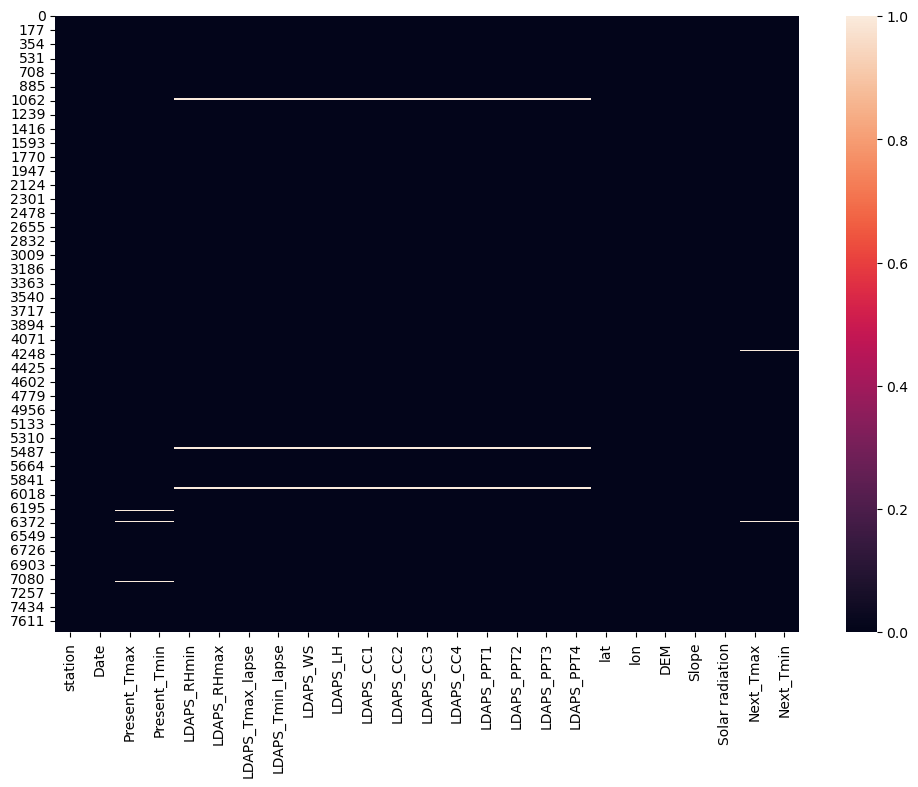

In [11]:
plt.figure(figsize=[12,8])
sns.heatmap(temp.isnull())

white lines represent the null values in our data .

In [12]:
temp.duplicated().sum()

0

There are no duplicate values in our dataset.

# Convert Object Data Type to Date

In [13]:
# convering the date into datetime format.
temp['Date']=pd.to_datetime(temp['Date'])

# Fill Null Values Using Mean, Median, and Mode and again check null values.


In [14]:
for col in temp.columns:
    temp[col]= temp[col].replace(np.nan,temp[col].median())

In [15]:
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [15]:
temp[temp.isna().any(axis=1)]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


No Null Values Present After Filling Missing Data

In [16]:
temp.nunique()

station               25
Date                 311
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [17]:
#checking the value count for each columns
for col in temp.columns:   
    print('--' * 10 + col + '--' * 10)
    display(temp[col].value_counts().head())

--------------------station--------------------


13.0    312
14.0    310
24.0    310
23.0    310
22.0    310
Name: station, dtype: int64

--------------------Date--------------------


2013-06-30    25
2016-07-19    25
2016-07-26    25
2016-07-25    25
2016-07-24    25
Name: Date, dtype: int64

--------------------Present_Tmax--------------------


29.9    166
31.4    112
29.4    111
29.1    108
29.7    107
Name: Present_Tmax, dtype: int64

--------------------Present_Tmin--------------------


23.4    206
24.0    161
23.8    153
23.1    144
23.5    143
Name: Present_Tmin, dtype: int64

--------------------LDAPS_RHmin--------------------


55.039024    76
19.794666     2
71.658089     2
77.030350     2
98.524734     2
Name: LDAPS_RHmin, dtype: int64

--------------------LDAPS_RHmax--------------------


89.793480     76
96.525200      2
99.251968      2
100.000153     2
94.795967      2
Name: LDAPS_RHmax, dtype: int64

--------------------LDAPS_Tmax_lapse--------------------


29.703426    76
17.624954     2
38.542255     2
28.074101     1
33.291634     1
Name: LDAPS_Tmax_lapse, dtype: int64

--------------------LDAPS_Tmin_lapse--------------------


23.760199    76
29.619342     2
14.272646     2
23.006936     1
24.050676     1
Name: LDAPS_Tmin_lapse, dtype: int64

--------------------LDAPS_WS--------------------


6.547470     76
21.857621     2
2.882580      2
6.818887      1
7.687755      1
Name: LDAPS_WS, dtype: int64

--------------------LDAPS_LH--------------------


 56.865482     76
-13.603212      2
 213.414006     2
 69.451805      1
 36.711299      1
Name: LDAPS_LH, dtype: int64

--------------------LDAPS_CC1--------------------


0.000000    108
0.315697     76
0.967277      2
0.233947      1
0.350181      1
Name: LDAPS_CC1, dtype: int64

--------------------LDAPS_CC2--------------------


0.000000    95
0.312421    76
0.968353     2
0.203896     1
0.007388     1
Name: LDAPS_CC2, dtype: int64

--------------------LDAPS_CC3--------------------


2.625546e-01    76
0.000000e+00    76
8.680560e-04     2
9.837888e-01     2
5.810000e-07     2
Name: LDAPS_CC3, dtype: int64

--------------------LDAPS_CC4--------------------


0.000000    137
0.227664     76
0.002604      7
0.005208      3
0.001736      3
Name: LDAPS_CC4, dtype: int64

--------------------LDAPS_PPT1--------------------


0.000000    4919
0.001953      11
0.002604       5
0.001734       3
0.000048       2
Name: LDAPS_PPT1, dtype: int64

--------------------LDAPS_PPT2--------------------


0.000000     5226
0.001953        7
0.000040        3
0.000781        3
21.621661       2
Name: LDAPS_PPT2, dtype: int64

--------------------LDAPS_PPT3--------------------


0.000000    5369
0.001953      10
0.000852       4
0.002604       3
0.000038       2
Name: LDAPS_PPT3, dtype: int64

--------------------LDAPS_PPT4--------------------


0.000000     5826
0.001953        3
16.655469       2
0.001065        2
0.001105        2
Name: LDAPS_PPT4, dtype: int64

--------------------lat--------------------


37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
Name: lat, dtype: int64

--------------------lon--------------------


127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
Name: lon, dtype: int64

--------------------DEM--------------------


212.3350    311
12.3700     311
30.9680     310
17.2956     310
15.5876     310
Name: DEM, dtype: int64

--------------------Slope--------------------


2.7850    310
0.5141    310
0.2713    310
0.2223    310
0.1554    310
Name: Slope, dtype: int64

--------------------Solar radiation--------------------


5992.895996    5
5131.895996    5
5124.781250    5
5165.472656    5
5147.032227    5
Name: Solar radiation, dtype: int64

--------------------Next_Tmax--------------------


30.5    121
29.3    113
33.0    106
31.3    104
29.6    101
Name: Next_Tmax, dtype: int64

--------------------Next_Tmin--------------------


23.5    159
23.4    157
24.0    156
23.1    156
23.2    150
Name: Next_Tmin, dtype: int64

# Correlation of Dataset


In [20]:
temp.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112582,0.131525,-0.066729,-0.166953,0.069107,0.104753,0.005275,-0.133339,0.006917,...,-0.008247,-0.012458,-0.010399,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107900,0.128216
Present_Tmax,0.112582,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,-0.313176,...,-0.101362,-0.122051,-0.101118,-0.052659,0.008990,-0.187138,-0.105884,-0.025401,0.610256,0.622700
Present_Tmin,0.131525,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,0.082000,...,0.064851,-0.049017,-0.065550,-0.078547,-0.043509,-0.250299,-0.146460,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.066729,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,0.613885,...,0.391110,0.240831,0.168797,0.087093,-0.076232,0.102108,0.123736,0.244643,-0.439171,0.094061
LDAPS_RHmax,-0.166953,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,0.436097,...,0.228398,0.134087,0.117376,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.069107,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,-0.438410,...,-0.242113,-0.188133,-0.160300,-0.042093,0.090665,-0.178895,-0.162332,0.047820,0.827473,0.587066
LDAPS_Tmin_lapse,0.104753,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,0.010691,...,0.000588,-0.088791,-0.094855,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588224,0.881074
LDAPS_WS,0.005275,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,0.289792,...,0.192427,0.162173,0.144550,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345578,-0.098730
LDAPS_LH,-0.133339,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,-0.146920,...,-0.077061,0.016483,0.020332,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155684,-0.056832
LDAPS_CC1,0.006917,-0.313176,0.082000,0.613885,0.436097,-0.438410,0.010691,0.289792,-0.146920,1.000000,...,0.389771,0.169130,0.092119,-0.008129,-0.006842,-0.014087,-0.020747,0.219264,-0.454771,-0.012732


<Axes: >

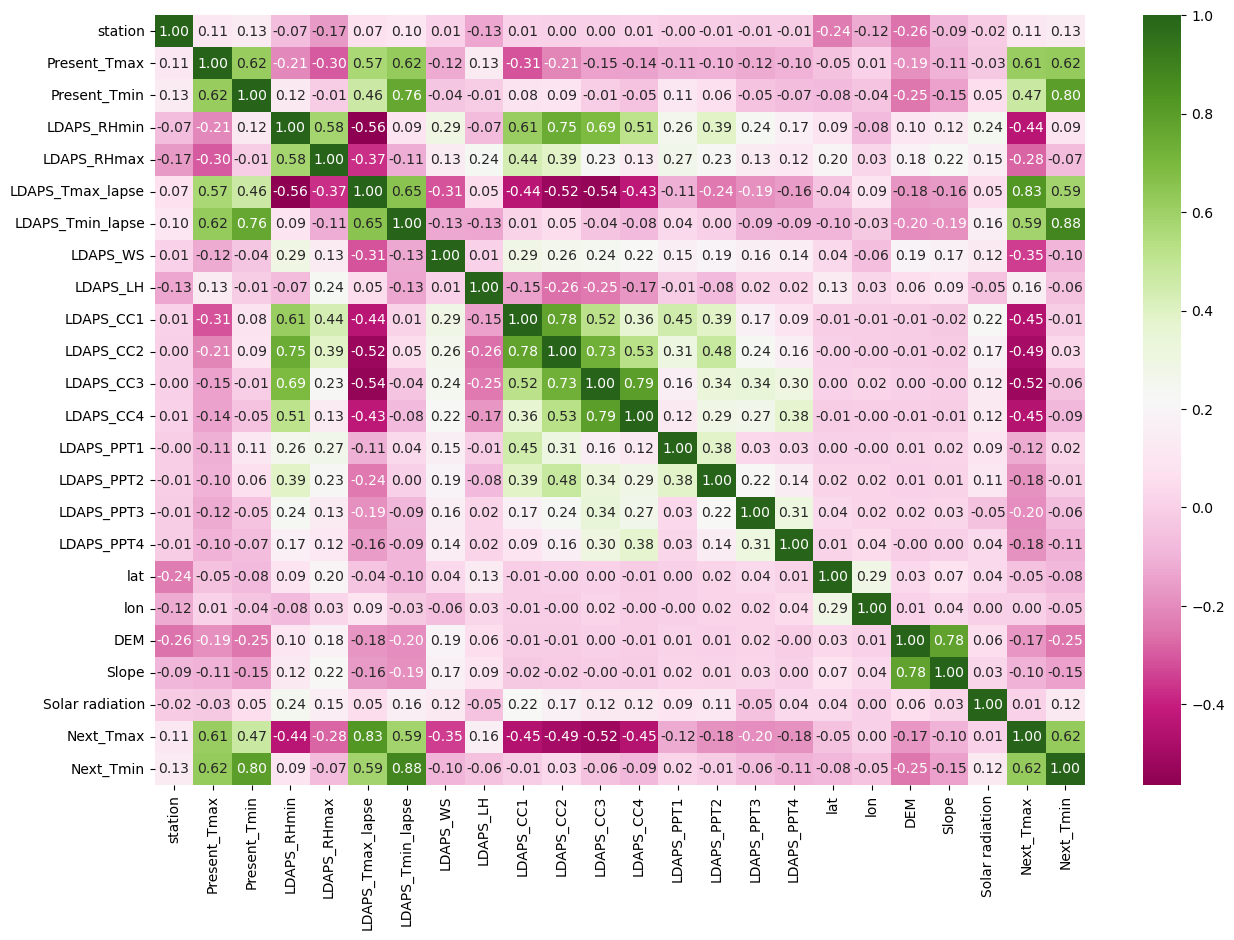

In [21]:
plt.figure(figsize=[15,10])
sns.heatmap(temp.corr(),annot = True, fmt ='0.2f', cmap="PiYG")

In [24]:
temp.corr()["Next_Tmax"].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827473
Next_Tmin           0.621434
Present_Tmax        0.610256
LDAPS_Tmin_lapse    0.588224
Present_Tmin        0.471723
LDAPS_LH            0.155684
station             0.107900
Solar radiation     0.008701
lon                 0.003076
lat                -0.053557
Slope              -0.102812
LDAPS_PPT1         -0.122365
DEM                -0.172614
LDAPS_PPT4         -0.181329
LDAPS_PPT2         -0.181556
LDAPS_PPT3         -0.196866
LDAPS_RHmax        -0.281282
LDAPS_WS           -0.345578
LDAPS_RHmin        -0.439171
LDAPS_CC4          -0.449457
LDAPS_CC1          -0.454771
LDAPS_CC2          -0.492615
LDAPS_CC3          -0.517125
Name: Next_Tmax, dtype: float64

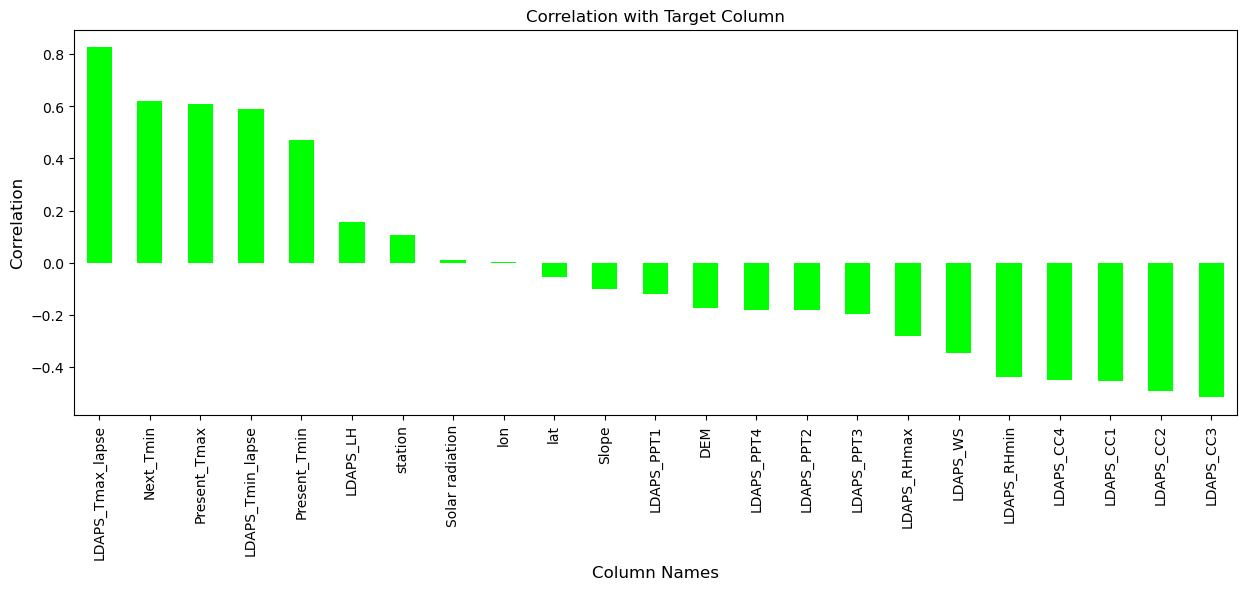

In [27]:
#considering target variable as capacity_mw
plt.figure(figsize = [15,5])
temp.corr()['Next_Tmax'].sort_values(ascending= False).drop('Next_Tmax').plot(kind = 'bar', color ='lime')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()


The 'LDAPS_Tmax_lapse', 'Next_Tmin', and 'Present_Tmax' columns exhibit a strong positive correlation with the target variable 'Next_Tmax', whereas 'LDAPS_CC3', 'LDAPS_CC2', 'LDAPS_CC1', and 'LDAPS_CC4' have the weakest positive correlation with 'Next_Tmax'.

In [25]:
temp.corr()["Next_Tmin"].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.881074
Present_Tmin        0.796657
Present_Tmax        0.622700
Next_Tmax           0.621434
LDAPS_Tmax_lapse    0.587066
station             0.128216
Solar radiation     0.120122
LDAPS_RHmin         0.094061
LDAPS_CC2           0.029829
LDAPS_PPT1          0.018645
LDAPS_PPT2         -0.010451
LDAPS_CC1          -0.012732
lon                -0.046580
LDAPS_CC3          -0.056604
LDAPS_LH           -0.056832
LDAPS_PPT3         -0.064651
LDAPS_RHmax        -0.070193
lat                -0.083577
LDAPS_CC4          -0.087510
LDAPS_WS           -0.098730
LDAPS_PPT4         -0.105625
Slope              -0.146963
DEM                -0.246977
Name: Next_Tmin, dtype: float64

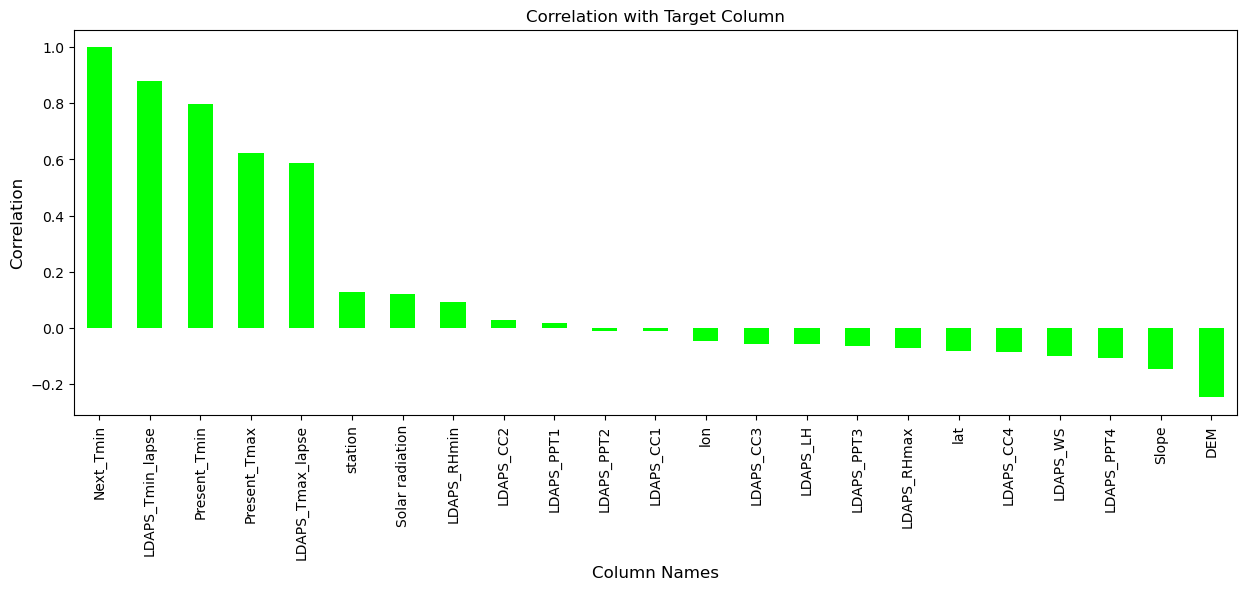

In [28]:
#considering target variable as capacity_mw
plt.figure(figsize = [15,5])
temp.corr()['Next_Tmin'].sort_values(ascending= False).drop('Next_Tmax').plot(kind = 'bar', color ='lime')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

The 'LDAPS_Tmin_lapse', 'Next_Tmin', and 'Present_Tmax' columns exhibit a strong positive correlation with the target variable 'Next_Tmax', whereas 'DEM', 'slope', 'LDAPS_WS', and 'LDAPS_PPT4' have the weakest positive correlation with 'Next_Tmax'.

# Data visualisation

In [29]:
features=temp[['station',
              'Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse',
              'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']]


<function matplotlib.pyplot.show(close=None, block=None)>

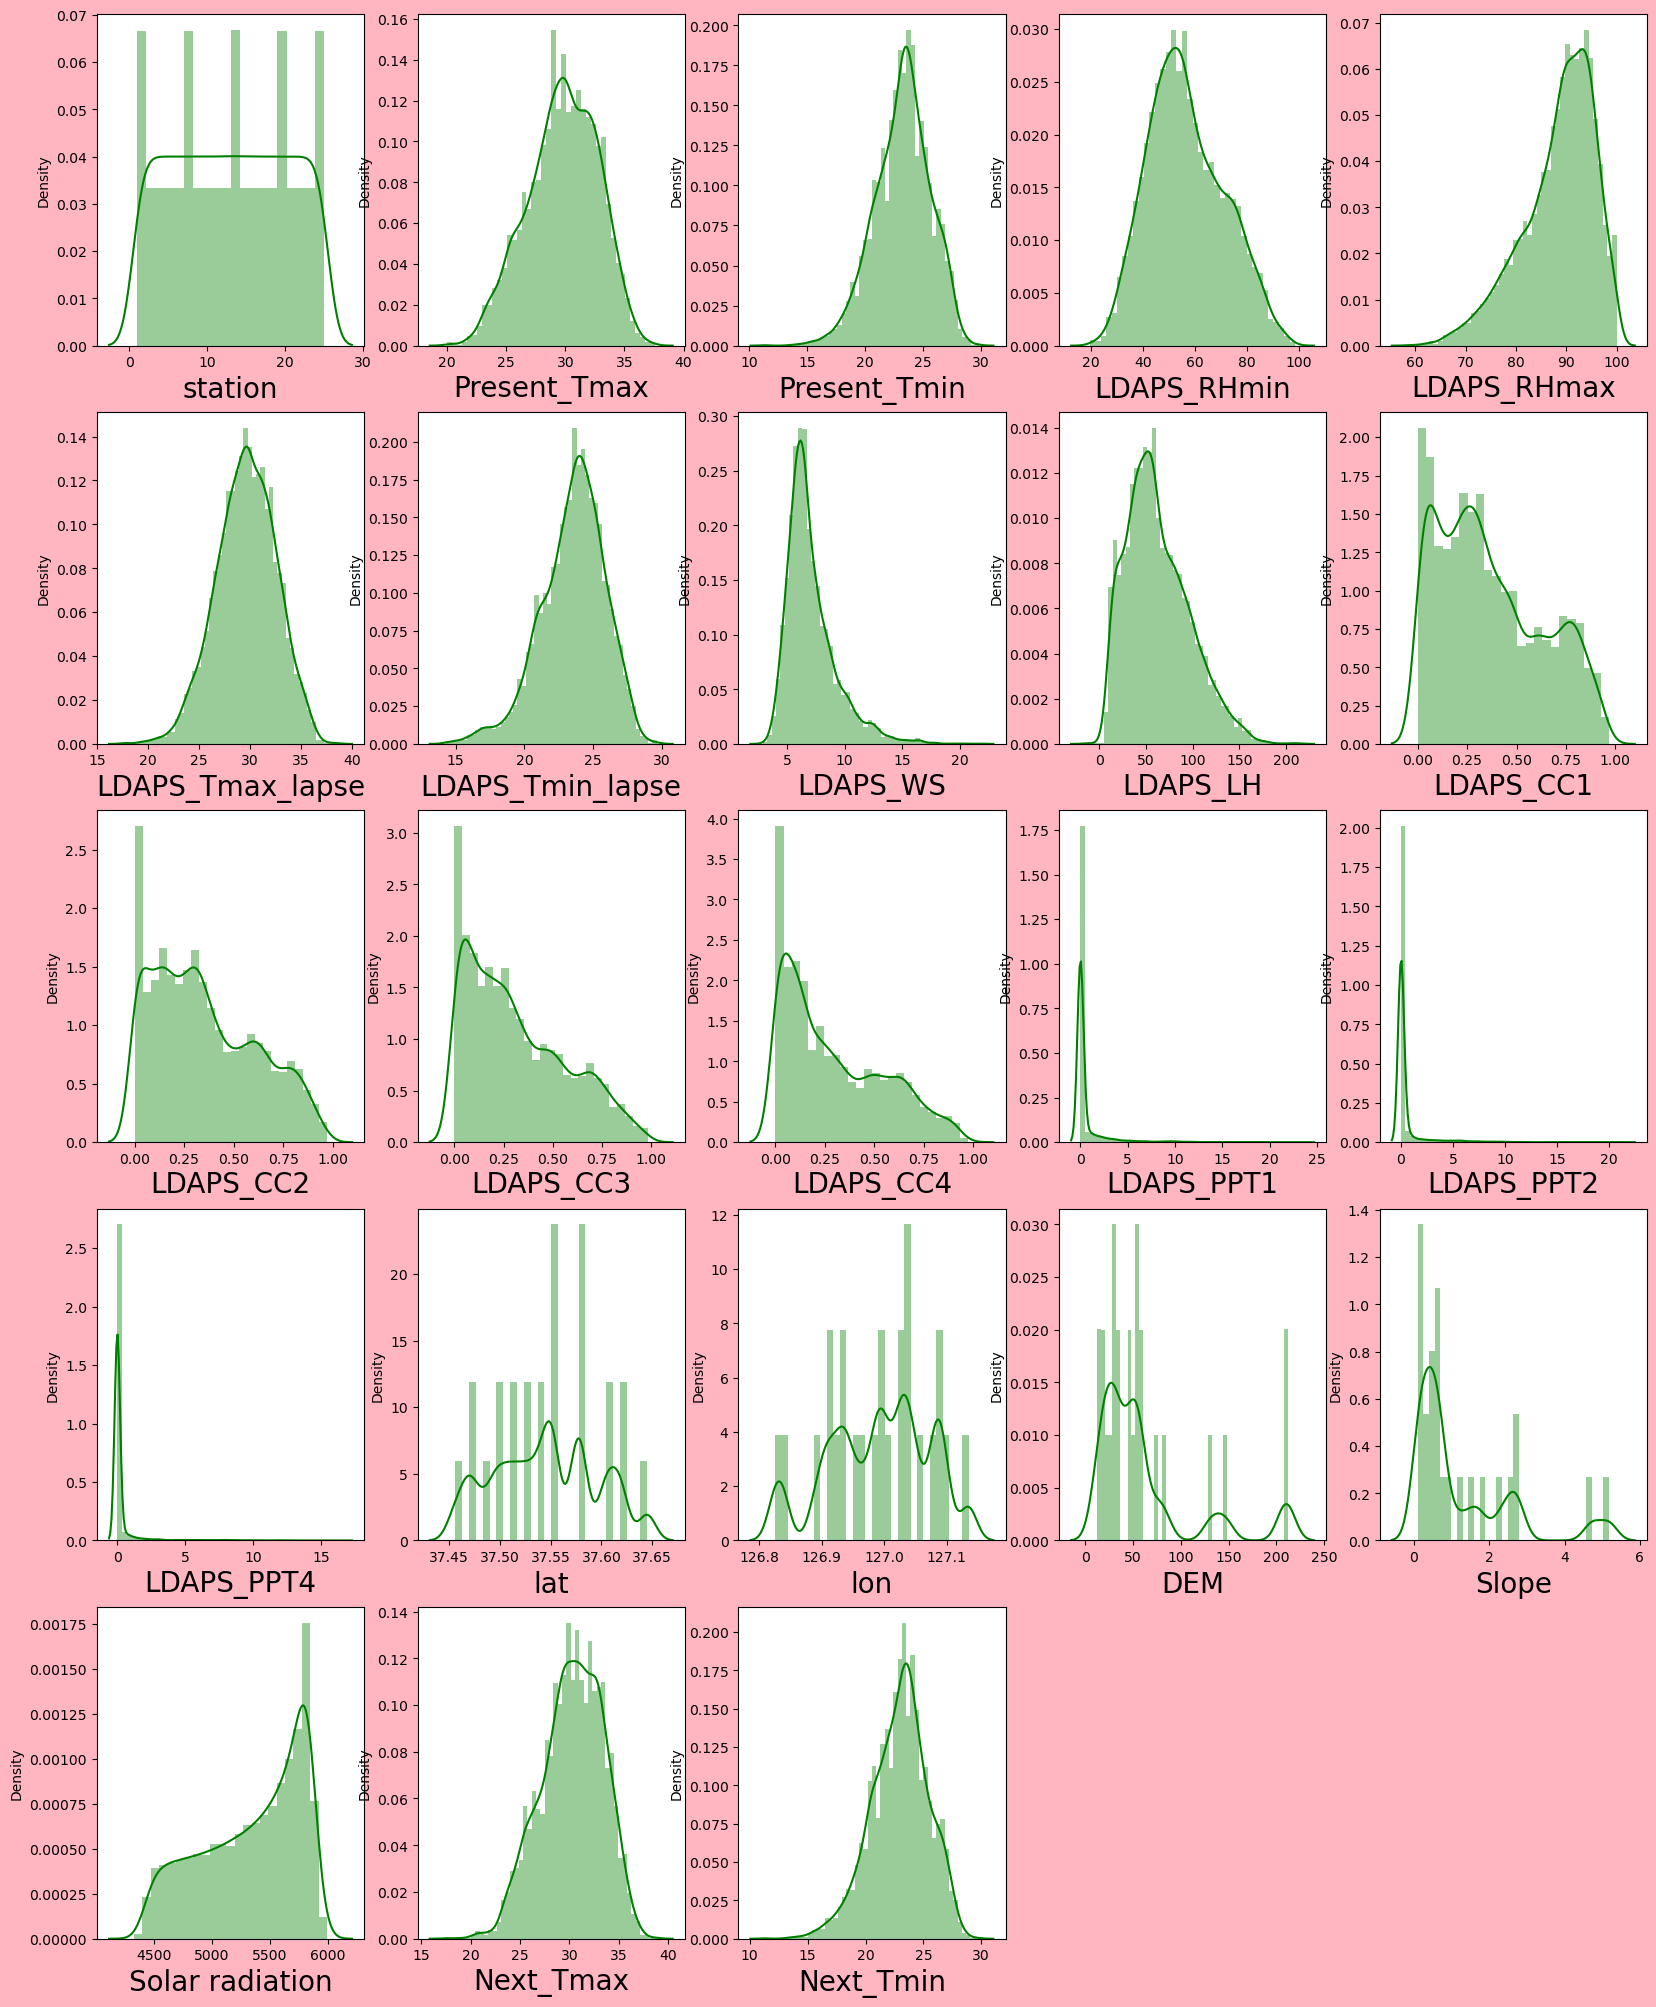

In [31]:
plt.figure(figsize=(20,25),facecolor='lightpink')
pltnum=1
for col in features:
    if pltnum<=25:
        plt.subplot(5,5,pltnum)
        sns.distplot(features[col],color='green')
        plt.xlabel(col,fontsize=20)
    pltnum+=1
plt.show

Almost all columns exhibit skewness.

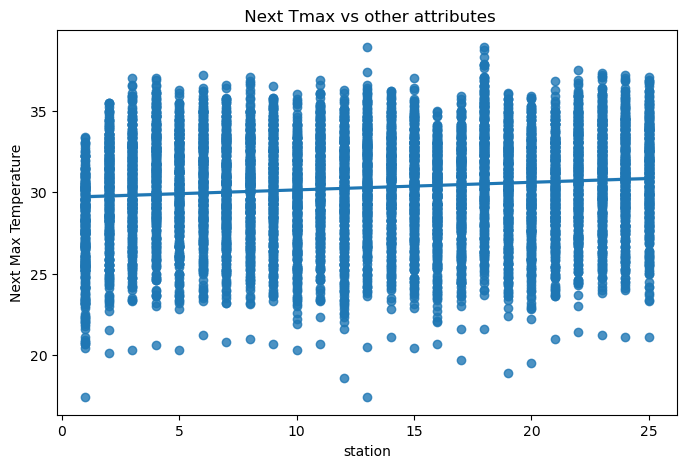

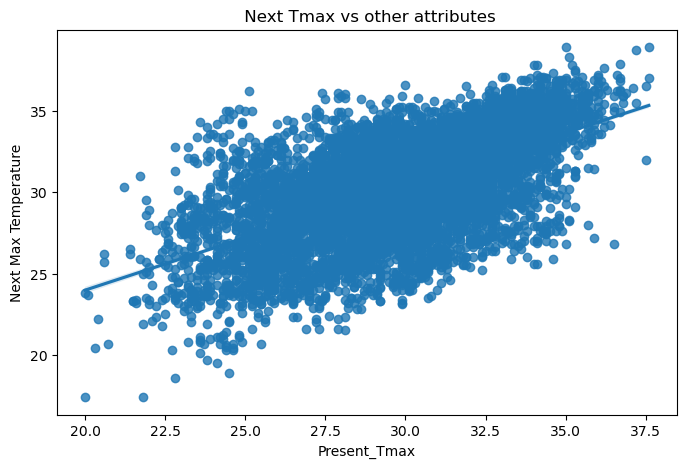

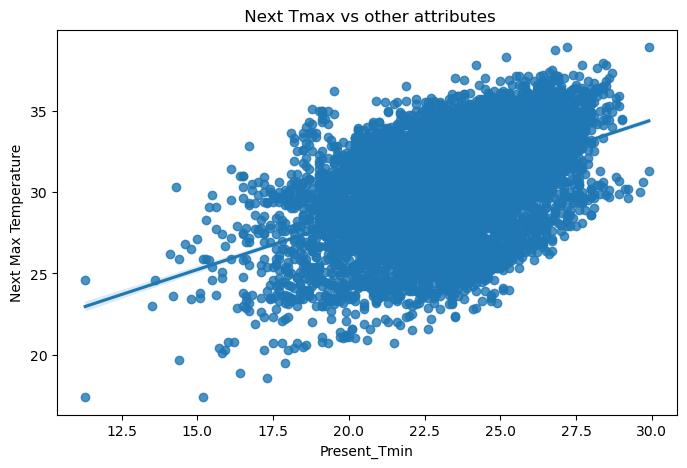

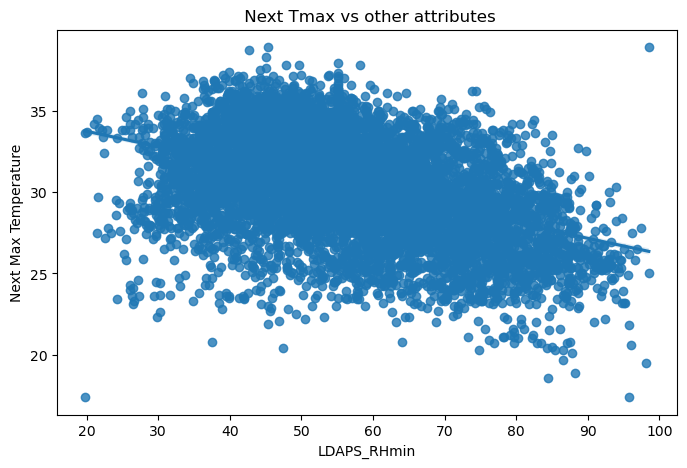

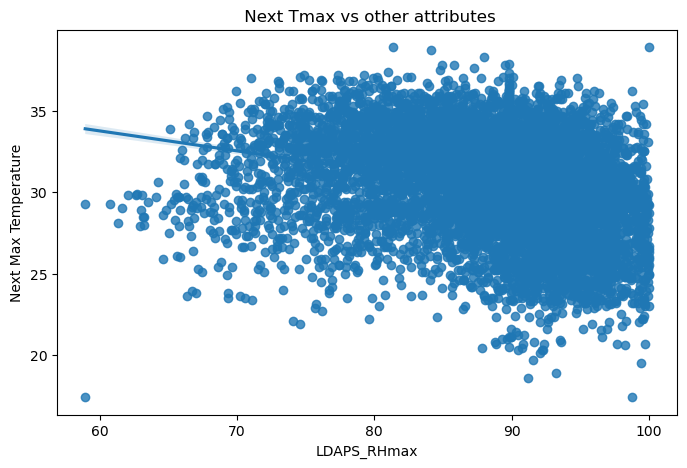

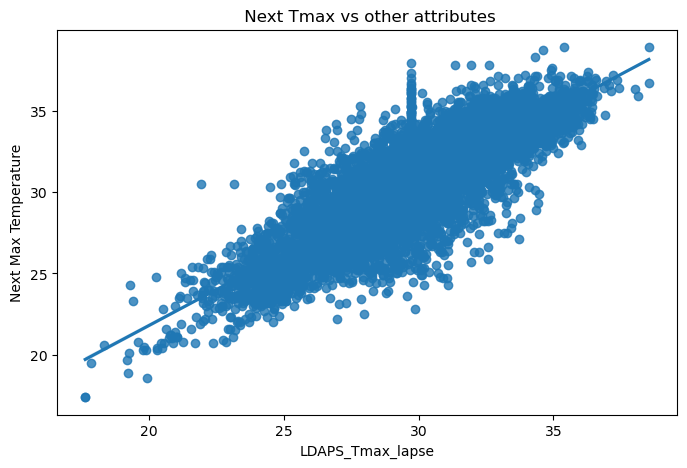

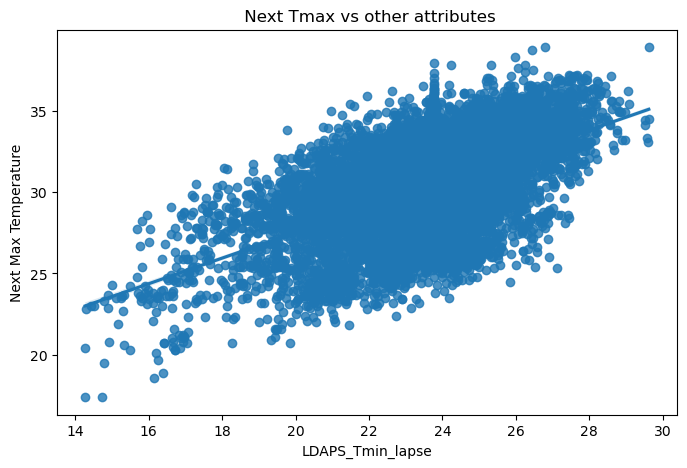

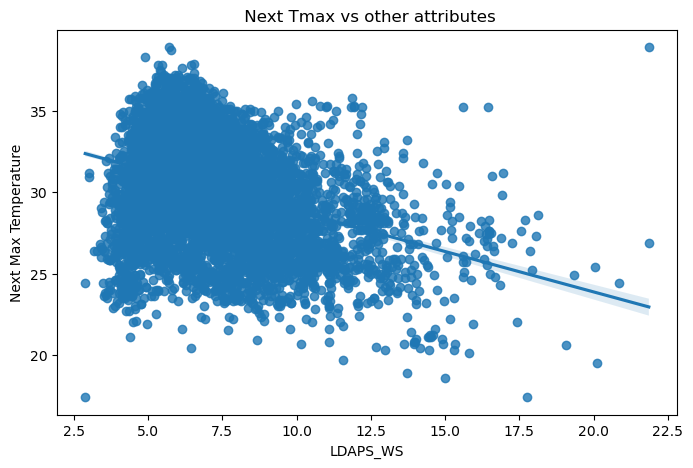

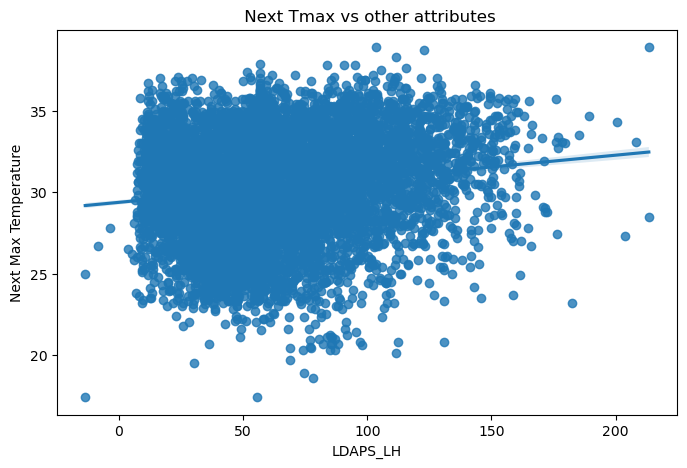

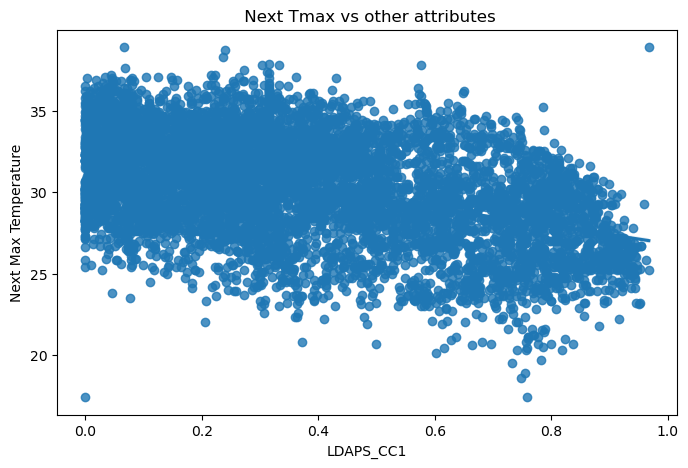

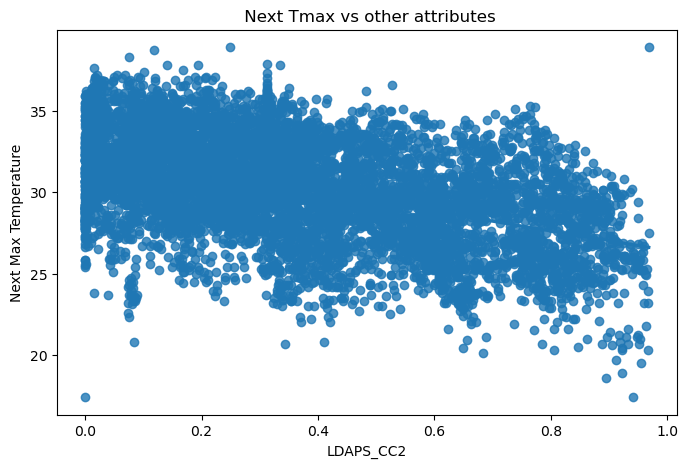

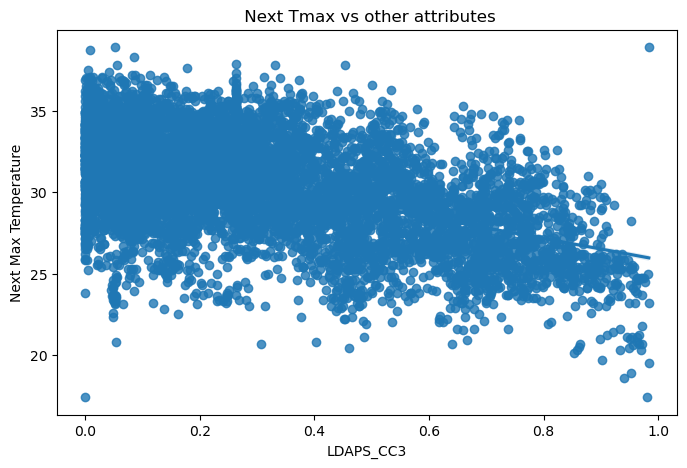

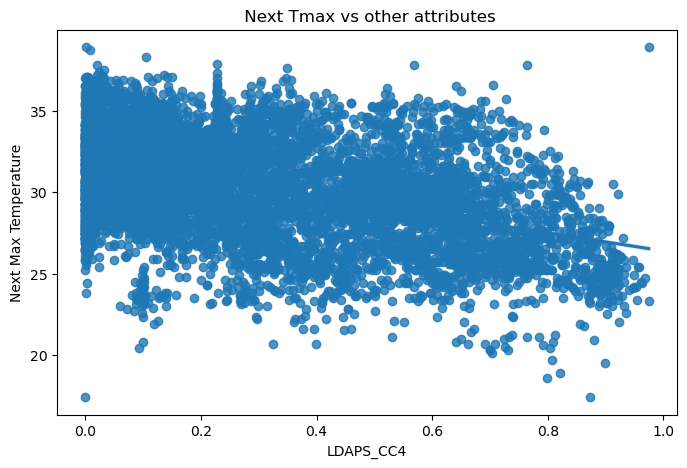

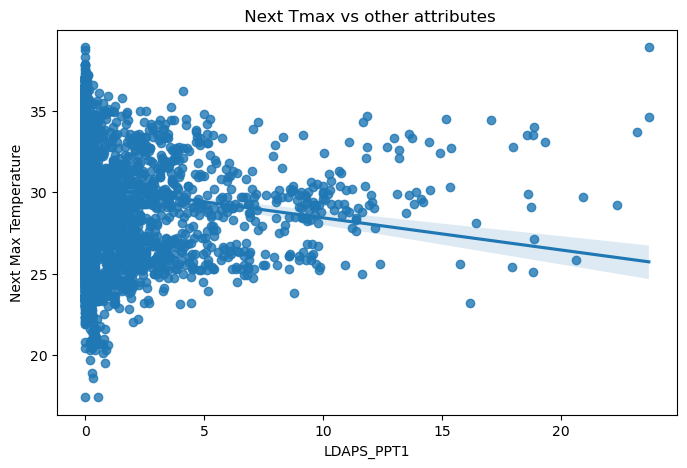

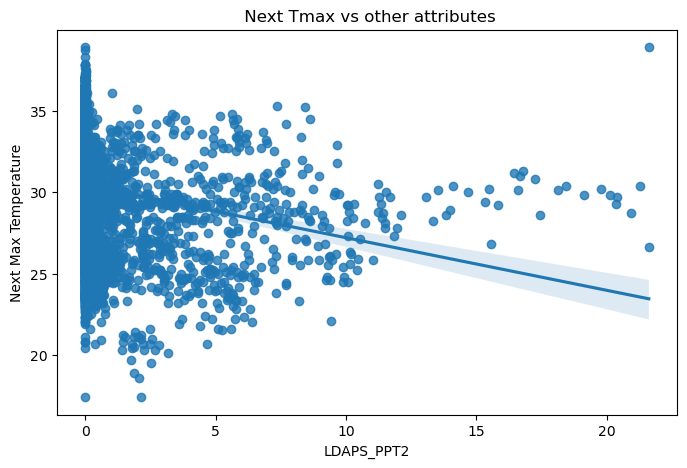

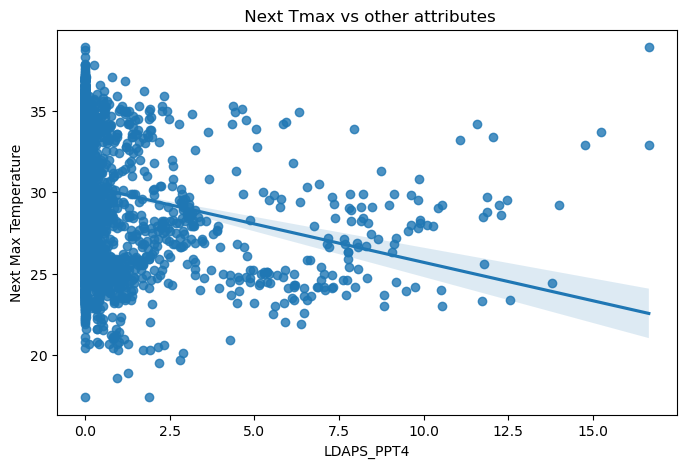

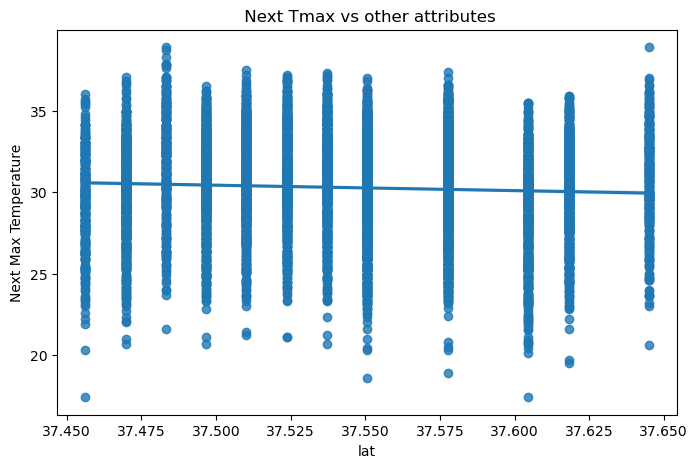

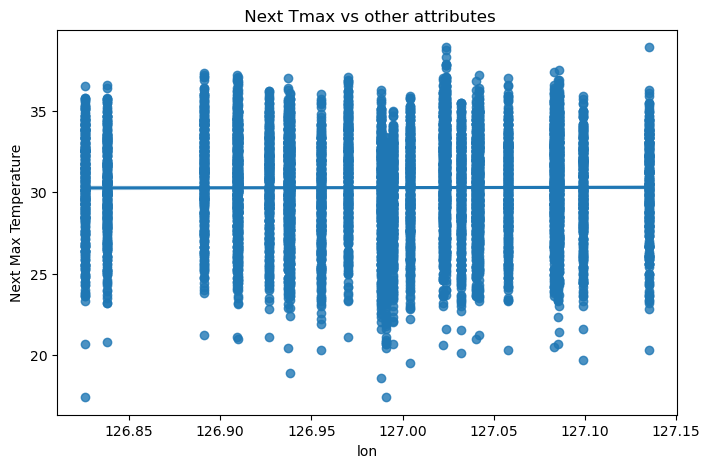

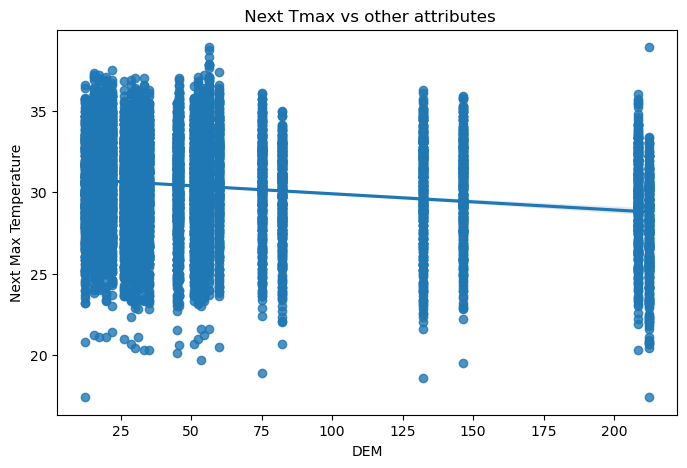

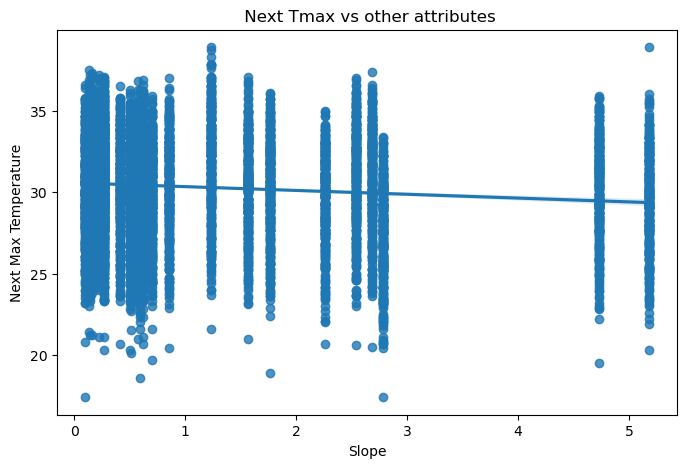

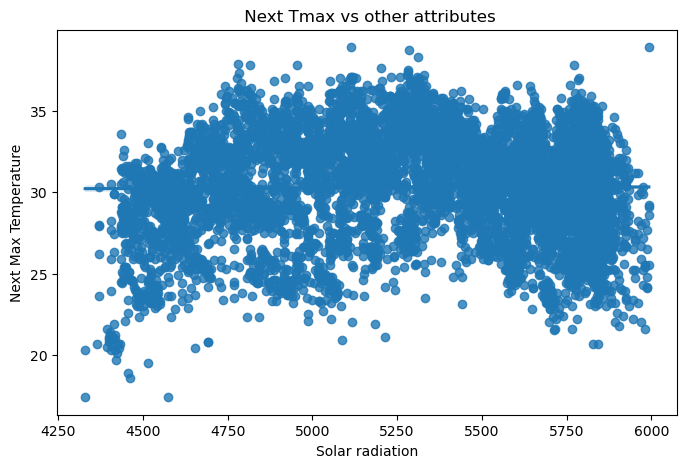

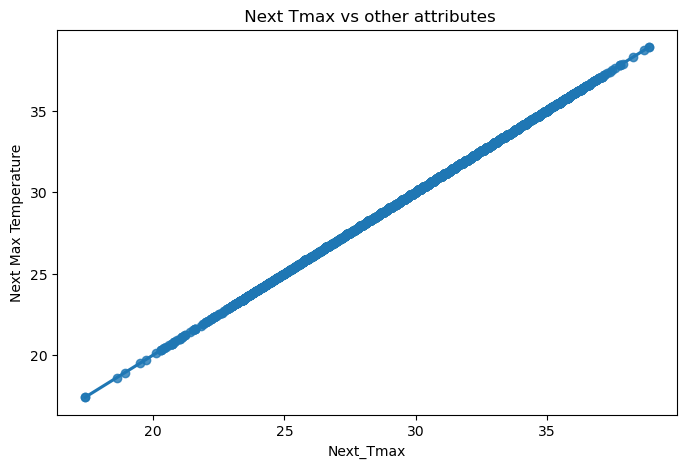

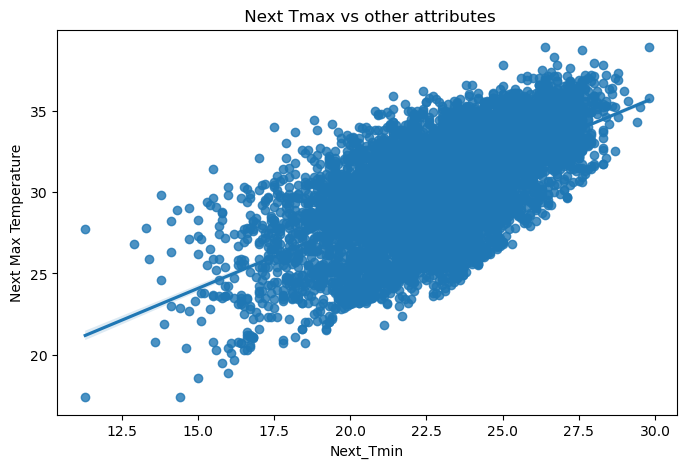

In [32]:
for i in features.columns:                                   
    plt.figure(figsize = (8, 5))
    sns.regplot(x=features[i],y= features['Next_Tmax'])
    plt.title(' Next Tmax vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Next Max Temperature')
    plt.show()

'Next_Tmin' is positive relationship with Present max , Present T_min,LDAPS_Tmax_Lapse,LDAPS_Tmin_Lapse and Next_Tmax, while negatively relationship with DEM,Slope and LDAPS_pp4

# Checking for outliers -

station                 Axes(0.125,0.77;0.133621x0.11)
Present_Tmax         Axes(0.285345,0.77;0.133621x0.11)
Present_Tmin          Axes(0.44569,0.77;0.133621x0.11)
LDAPS_RHmin          Axes(0.606034,0.77;0.133621x0.11)
LDAPS_RHmax          Axes(0.766379,0.77;0.133621x0.11)
LDAPS_Tmax_lapse       Axes(0.125,0.638;0.133621x0.11)
LDAPS_Tmin_lapse    Axes(0.285345,0.638;0.133621x0.11)
LDAPS_WS             Axes(0.44569,0.638;0.133621x0.11)
LDAPS_LH            Axes(0.606034,0.638;0.133621x0.11)
LDAPS_CC1           Axes(0.766379,0.638;0.133621x0.11)
LDAPS_CC2              Axes(0.125,0.506;0.133621x0.11)
LDAPS_CC3           Axes(0.285345,0.506;0.133621x0.11)
LDAPS_CC4            Axes(0.44569,0.506;0.133621x0.11)
LDAPS_PPT1          Axes(0.606034,0.506;0.133621x0.11)
LDAPS_PPT2          Axes(0.766379,0.506;0.133621x0.11)
LDAPS_PPT3             Axes(0.125,0.374;0.133621x0.11)
LDAPS_PPT4          Axes(0.285345,0.374;0.133621x0.11)
lat                  Axes(0.44569,0.374;0.133621x0.11)
lon       

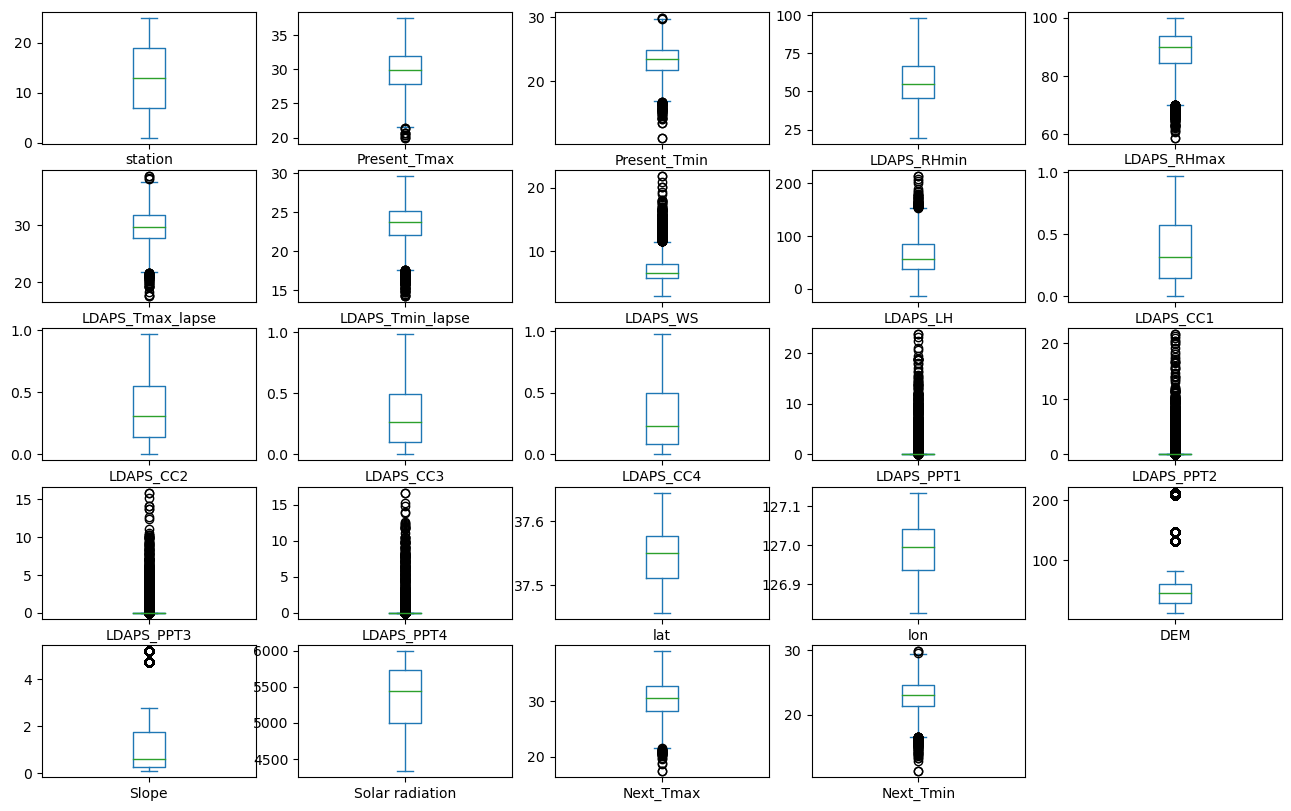

In [33]:
#Checking for outliers -
temp.plot(kind='box',subplots=True,layout=(6,5),figsize=(16,12))

columns 'station','LDAPS_RHmin 'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3',LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation do not have any outliers , while Present_Tmax,Present_Tmin,'LDAPS_RHmax,LDAPS_Tmaxlapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PP1,LDAPS_PP2,LDAPS_PP3,LDAPS_PP4,Next_tmax,Next_tmin does have outliers in them .

# cheking and Removing the skewness in data

In [34]:
temp.skew().sort_values(ascending = False)

LDAPS_PPT4          6.826930
LDAPS_PPT3          6.458608
LDAPS_PPT2          5.776835
LDAPS_PPT1          5.395178
DEM                 1.723257
LDAPS_WS            1.584975
Slope               1.563020
LDAPS_LH            0.678315
LDAPS_CC4           0.673700
LDAPS_CC3           0.646670
LDAPS_CC2           0.477041
LDAPS_CC1           0.465003
LDAPS_RHmin         0.303565
lat                 0.087062
station             0.000000
LDAPS_Tmax_lapse   -0.228767
Present_Tmax       -0.265337
lon                -0.285213
Next_Tmax          -0.340943
Present_Tmin       -0.369481
Next_Tmin          -0.405143
Solar radiation    -0.511210
LDAPS_Tmin_lapse   -0.584737
LDAPS_RHmax        -0.860210
dtype: float64

# removing skewness


In [35]:
#removing skewness
import datetime as ddt

temp['Date'] = pd.to_datetime(temp['Date'])
temp['Date'] = temp['Date'].map(ddt.datetime.toordinal)

In [36]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

for i in temp.columns:
    if abs(temp.loc[:,i].skew())>0.5:
        temp.loc[:,i]=pt.fit_transform(temp.loc[:,i].values.reshape(-1,1))

In [37]:
temp.skew().sort_values(ascending = False)

LDAPS_PPT4          2.059400
LDAPS_PPT3          1.824919
LDAPS_PPT2          1.646417
LDAPS_PPT1          1.463941
LDAPS_CC2           0.477041
LDAPS_CC1           0.465003
LDAPS_RHmin         0.303565
Slope               0.233968
LDAPS_CC4           0.129826
LDAPS_CC3           0.089672
lat                 0.087062
LDAPS_LH            0.058865
DEM                 0.039456
LDAPS_WS            0.002449
station             0.000000
Date               -0.001692
LDAPS_Tmin_lapse   -0.018120
LDAPS_RHmax        -0.116481
Solar radiation    -0.176636
LDAPS_Tmax_lapse   -0.228767
Present_Tmax       -0.265337
lon                -0.285213
Next_Tmax          -0.340943
Present_Tmin       -0.369481
Next_Tmin          -0.405143
dtype: float64

We can see that skewness has been removed from the dataset, and it is now skewness-free.


# Removing outliers

In [38]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(temp))
temp_new=temp[(z<3).all(axis=1)]
temp_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,0.269762,28.074101,-0.314003,0.097757,0.312316,...,-0.519114,-0.492283,-0.444377,37.6046,126.991,1.834978,1.314153,1.849430,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,0.182577,29.850689,0.142820,-0.622109,-0.209702,...,-0.519114,-0.492283,-0.444377,37.6046,127.032,0.055979,-0.385336,1.400702,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,-0.776602,30.091292,0.393133,-0.310859,-1.373795,...,-0.519114,-0.492283,-0.444377,37.5776,127.058,-0.364575,-0.949164,1.380650,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,1.315999,29.704629,-0.176064,-0.653345,0.206140,...,-0.519114,-0.492283,-0.444377,37.6450,127.022,0.084879,1.235263,1.357783,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,0.107639,29.113934,-0.105479,-0.590312,1.301881,...,-0.519114,-0.492283,-0.444377,37.5507,127.135,-0.290442,-0.401730,1.366748,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,736571,23.1,17.8,24.688997,-1.385244,27.812697,-1.967021,-0.024069,-1.940661,...,-0.519114,-0.492283,-0.444377,37.5507,127.040,-0.721547,-0.279532,-1.738996,27.6,17.7
7746,22.0,736571,22.5,17.4,30.094858,-0.811158,26.704905,-2.101124,-0.566181,0.658275,...,-0.519114,-0.492283,-0.444377,37.5102,127.086,-1.006002,-1.354811,-1.756451,28.0,17.1
7747,23.0,736571,23.3,17.1,26.741310,-1.328635,26.352081,-1.831058,-0.303861,0.385275,...,-0.519114,-0.492283,-0.444377,37.5372,126.891,-1.578128,-1.280447,-1.754608,28.3,18.1
7748,24.0,736571,23.3,17.7,24.040634,-1.471468,27.010193,-1.843442,-0.059415,-0.361066,...,-0.519114,-0.492283,-0.444377,37.5237,126.909,-1.400633,-1.072947,-1.760631,28.6,18.8


In [40]:
# Checking the percentage of data loss -
loss = (temp.shape[0]-temp_new.shape[0])/temp.shape[0]*100
print('loss of data:',loss)

loss of data: 1.4189886480908152


# Splitting the dataset

In [43]:
x = temp_new.drop(["Next_Tmax","Next_Tmin"],axis=1)
y = temp_new["Next_Tmax"]
Y = temp_new["Next_Tmin"]
z = x.columns


In [44]:
print(x.shape)
print(y.shape)
print(Y.shape)

(7642, 23)
(7642,)
(7642,)


In [45]:
print(y.value_counts())

30.5    121
29.3    113
33.0    106
31.3    104
29.6    101
       ... 
22.1      1
22.7      1
38.3      1
21.5      1
21.9      1
Name: Next_Tmax, Length: 169, dtype: int64


In [46]:
print(Y.value_counts())

23.5    159
23.4    157
24.0    156
23.1    156
23.2    149
       ... 
29.1      1
15.6      1
28.2      1
29.8      1
29.0      1
Name: Next_Tmin, Length: 137, dtype: int64


# Checking multicollinearity using Variance Inflation Factor


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vifscore(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values('VIF Factor',ascending = True))

In [48]:
vifscore(x)

,Column Name,VIF Factor
22,Solar radiation,1.241083e+00
8,LDAPS_WS,1.251858e+00
9,LDAPS_LH,1.499722e+00
16,LDAPS_PPT3,1.758982e+00
17,LDAPS_PPT4,1.784593e+00
15,LDAPS_PPT2,2.345888e+00
14,LDAPS_PPT1,2.595836e+00
5,LDAPS_RHmax,2.681444e+00
21,Slope,2.858756e+00
13,LDAPS_CC4,3.031812e+00


There is multicollinearity present in our data.The VIF Score of 'generation_gwh_2016','generation_gwh_2017' and 'generation_gwh_2015' are high '
we cannot further miss-out more data from the dataset, we will proceed with further ahead keep this data same .

# model building

In [51]:
#Model 
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

#Metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [52]:
def random_st_tmax(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = r2_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs


In [53]:
def model_fit_tmax(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    r2 = r2_score(y_test,pred_test)
    mse = mean_squared_error(y_test,pred_test)
    mae = mean_absolute_error(y_test,pred_test)
    cv_score = cross_val_score(model,x,y, cv = 8)
    cv_mean = cv_score.mean()
    print("\n R2 score is ", r2)
    print("-"*50)
    print("Mean Sqaured Error is ",mse)
    print("-"*50)
    print("Mean Absolute Error is ",mae)
    print("-"*50)
    print("The cv score is ", cv_mean, "and the R2 score  is ",r2)
    print(f'\n Difference between accuracy score and cross val score {(r2-cv_mean)*100:.2f}')
    print("-"*50)

In [54]:
def model_tmax(m):
    m_rs = random_st_tmax(m)
    model_fit_tmax(m,m_rs)

In [55]:
Model_regres = [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor()]

In [56]:
for i in Model_regres:
    model_tmax(i)


 LinearRegression()
At random state  30 the model is having accuracy score of  0.779036081302176

 R2 score is  0.779036081302176
--------------------------------------------------
Mean Sqaured Error is  2.1487299999671987
--------------------------------------------------
Mean Absolute Error is  1.09951183249529
--------------------------------------------------
The cv score is  0.6590170987638356 and the R2 score  is  0.779036081302176

 Difference between accuracy score and cross val score 12.00
--------------------------------------------------

 RandomForestRegressor()
At random state  30 the model is having accuracy score of  0.9169409107033213

 R2 score is  0.9171188187002646
--------------------------------------------------
Mean Sqaured Error is  0.8059654342707654
--------------------------------------------------
Mean Absolute Error is  0.670844342707652
--------------------------------------------------
The cv score is  0.6541989173023479 and the R2 score  is  0.917118818

RandomForestRegressor is the best model with 91.6 accuracy

# Hyper Parameter Tuning

In [92]:
parameters = {'n_estimators':[100,125,150,200],
             'criterion': ['squared_error','absolute_error'],
             'max_features': ['sqrt','log2'],
             'max_depth':[10,20,30,None]}

grid_tmax = GridSearchCV(estimator = RandomForestRegressor(),param_grid=parameters, cv = 3,n_jobs=-1)

In [93]:
grid_tmax.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 125, 150, 200]})

In [94]:
grid_tmax.best_score_

0.6882516157186824

In [95]:
grid_tmax.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [96]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = 47)

In [97]:
final_model_tmax = RandomForestRegressor(n_estimators=200,max_depth= 20,max_features='sqrt',criterion='squared_error')
final_model_tmax.fit(x_train,y_train)
pred_reg = final_model_tmax.predict(x_test)
print('R2 Score',r2_score(y_test,pred_reg))
print('Mean Squared Error',mean_squared_error(y_test,pred_reg))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_reg))
cv_score = cross_val_score(final_model_tmax,x,y, cv = 5)
cv_mean =cv_score.mean()
print("At cv fold",5," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(y_test,pred_reg))

R2 Score 0.9115849359763821
Mean Squared Error 0.7825656235997481
Mean Absolute Error 0.6674828921915279
At cv fold 5  the cv score is  0.6700313225452551 and the R2 score  is  0.9115849359763821


In [98]:
# Saving the model
import joblib
joblib.dump(final_model_tmax,'TemperatureForecast-nextmax.pkl')


['TemperatureForecast-nextmax.pkl']

In [99]:
load_model = joblib.load('TemperatureForecast-nextmax.pkl')
prediction = load_model.predict(x_test)
pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted-TMAX","Original-TMAX"]).T

,Predicted-TMAX,Original-TMAX
0,35.745861,36.0
1,31.283276,31.7
2,26.318405,25.3
3,32.315877,35.2
4,32.577113,33.4
...,...,...
1524,32.012750,32.5
1525,32.751283,32.0
1526,28.182946,27.6
1527,28.041864,28.4


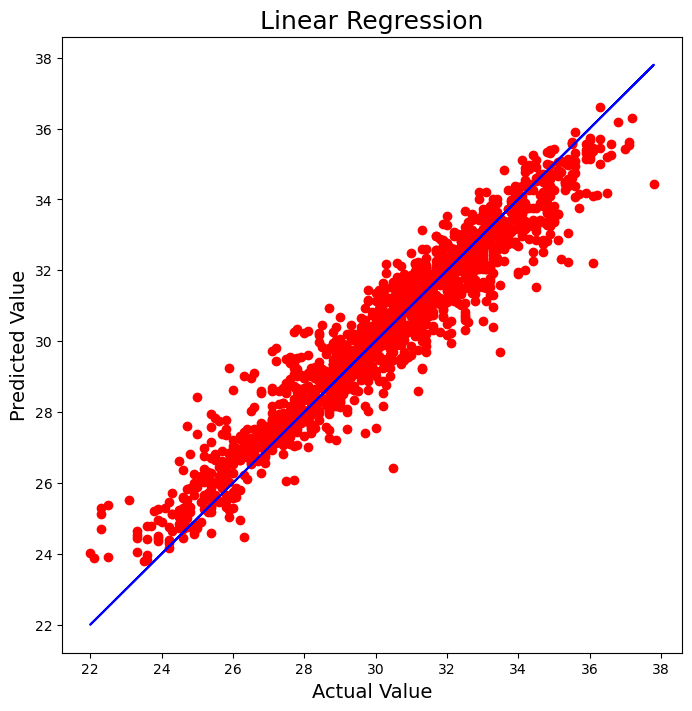

In [100]:
plt.figure(figsize = (8,8))
plt.scatter(x = y_test, y=prediction, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Value', fontsize = 14)
plt.ylabel('Predicted Value', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

# 2 target variable tmin

In [71]:
def random_st_tmin(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x,Y,test_size = 0.20, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = r2_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [72]:
def model_fit_tmin(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x,Y,test_size = 0.20, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    r2 = r2_score(y_test,pred_test)
    mse = mean_squared_error(y_test,pred_test)
    mae = mean_absolute_error(y_test,pred_test)
    cv_score = cross_val_score(model,x,Y, cv = 8)
    cv_mean = cv_score.mean()
    print("\n R2 score is ", r2)
    print("-"*50)
    print("Mean Sqaured Error is ",mse)
    print("-"*50)
    print("Mean Absolute Error is ",mae)
    print("-"*50)
    print("The cv score is ", cv_mean, "and the R2 score  is ",r2)
    print(f'\n Difference between accuracy score and cross val score {(r2-cv_mean)*100:.2f}')
    print("-"*50)

In [73]:
def model_tmin(m):
    m_rs = random_st_tmin(m)
    model_fit_tmin(m,m_rs)

In [74]:
for i in Model_regres:
    model_tmin(i)


 LinearRegression()
At random state  24 the model is having accuracy score of  0.8345560569399417

 R2 score is  0.8345560569399417
--------------------------------------------------
Mean Sqaured Error is  0.9758349953278748
--------------------------------------------------
Mean Absolute Error is  0.7764283179692506
--------------------------------------------------
The cv score is  0.75438372768289 and the R2 score  is  0.8345560569399417

 Difference between accuracy score and cross val score 8.02
--------------------------------------------------

 RandomForestRegressor()
At random state  22 the model is having accuracy score of  0.9120405691104129

 R2 score is  0.9095522231370494
--------------------------------------------------
Mean Sqaured Error is  0.4913800725964686
--------------------------------------------------
Mean Absolute Error is  0.5421340745585351
--------------------------------------------------
The cv score is  0.7576002033945919 and the R2 score  is  0.909552

# Hyper Parameter Tuning

In [83]:
parameters = {'n_estimators':[100,125,150,200],
             'criterion': ['squared_error','absolute_error'],
             'max_features': ['sqrt','log2'],
             'max_depth':[10,20,30,None]}

grid_tmin = GridSearchCV(estimator = RandomForestRegressor(),param_grid=parameters, cv = 3,n_jobs=-1 )

In [84]:
grid_tmin.fit(x,Y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 125, 150, 200]})

In [85]:
grid_tmin.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 150}

In [75]:
x_train, x_test,y_train,y_test= train_test_split(x,Y,test_size = 0.20, random_state = 47)

In [86]:
final_model_tmin = RandomForestRegressor(n_estimators=150,max_depth= 20,max_features='log2',criterion='squared_error')
final_model_tmin.fit(x_train,y_train)
pred_reg = final_model_tmin.predict(x_test)
print('R2 Score',r2_score(y_test,pred_reg))
print('Mean Squared Error',mean_squared_error(y_test,pred_reg))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_reg))
cv_score = cross_val_score(final_model_tmin,x,Y, cv = 5)
cv_mean =cv_score.mean()
print("At cv fold",5," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(y_test,pred_reg))

R2 Score 0.9121369995092737
Mean Squared Error 0.5224803192680091
Mean Absolute Error 0.55268920103623
At cv fold 5  the cv score is  0.7605395147986231 and the R2 score  is  0.9121369995092737


In [87]:
# Saving the model

import joblib
joblib.dump(final_model_tmin,'TemperatureForecast-nextmin.pkl')

['TemperatureForecast-nextmin.pkl']

In [88]:
load_model = joblib.load('TemperatureForecast-nextmin.pkl')
prediction_min = load_model.predict(x_test)
pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted-TMin","Original-TMin"]).T

,Predicted-TMin,Original-TMin
0,26.821989,27.5
1,23.749720,24.2
2,22.666225,22.2
3,23.757335,24.6
4,25.849561,25.8
...,...,...
1524,25.738291,25.8
1525,25.311898,25.2
1526,22.273066,22.8
1527,20.238671,20.5


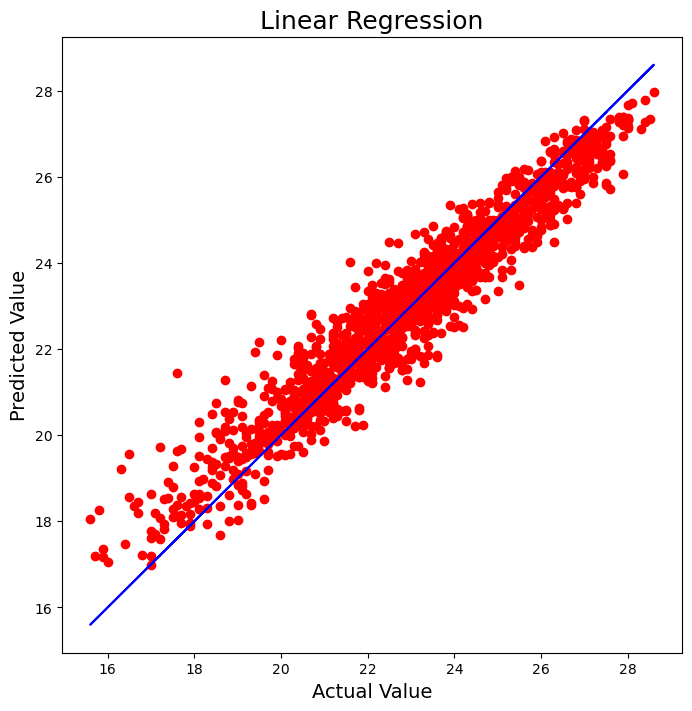

In [89]:
plt.figure(figsize = (8,8))
plt.scatter(x = y_test, y=prediction_min, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Value', fontsize = 14)
plt.ylabel('Predicted Value', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()